In [126]:
import numpy as np
import pandas as pd
import warnings
import riskfolio as rp
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

In [127]:
acwi_tbsc = pd.read_excel('./acwi_tbsc.xlsx', sheet_name='2011-2021')
acwi_tbsc

,ACWI,TBSC
0,0.2500%,1.2600%
1,-5.5900%,0.4900%
2,3.7000%,1.1300%
3,5.6800%,-0.3800%
4,4.3100%,1.1000%
...,...,...
115,2.5000%,0.2600%
116,8.8200%,-1.1800%
117,-0.2800%,-0.0200%
118,-1.1400%,-0.2300%


In [128]:
port = rp.Portfolio(returns=acwi_tbsc)

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

points = 10 # Number of points of the frontier
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0.07 # Risk free rate

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head(20))

,ACWI,TBSC
0,4.7230%,95.2770%
1,26.2242%,73.7758%
2,37.2989%,62.7011%
3,47.1100%,52.8900%
4,56.3825%,43.6175%
5,65.3640%,34.6360%
6,74.1676%,25.8324%
7,82.8534%,17.1466%
8,91.4567%,8.5433%
9,100.0000%,0.0000%


In [129]:
obj = 'Sharpe'
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, hist=hist)

display(w)

The problem doesn't have a solution with actual input parameters


None

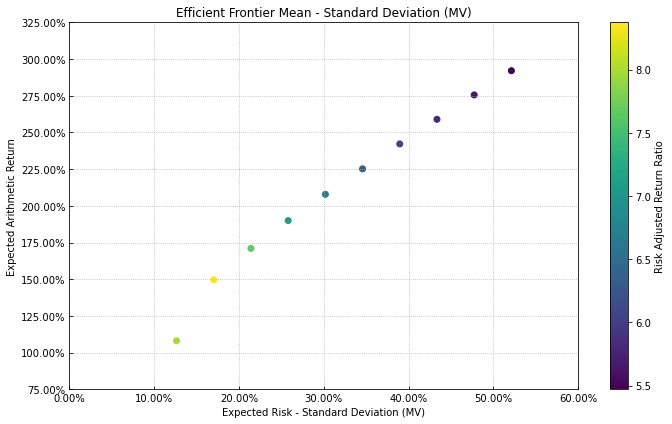

In [130]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets



ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

fig = ax.get_figure()




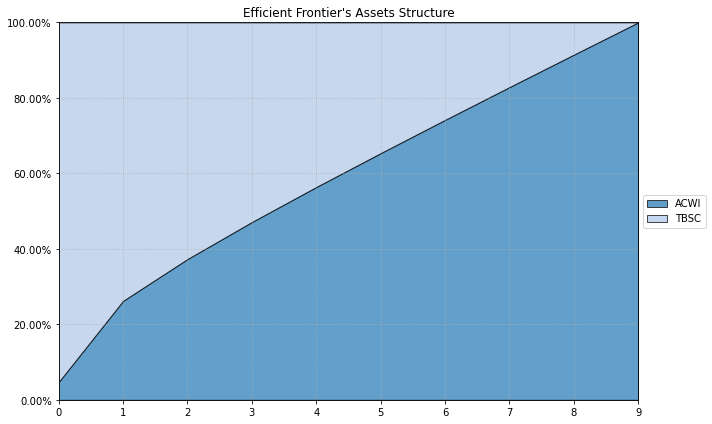

In [131]:

# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)



In [149]:
means = pd.read_excel('mean_variance.xlsx')
cov_table = pd.read_excel('mean_variance.xlsx', sheet_name='cov_matrix')
cov_table = cov_table.set_index('Unnamed: 0').to_numpy()
weghts = pd.read_excel('mean_variance.xlsx', sheet_name='weights')
weghts

,U.S. Bonds,International Stocks,U.S. Stocks
0,90.9800%,2.2500%,6.7700%
1,85.0000%,0.3300%,14.6700%
2,79.0300%,-1.6000%,22.5700%
3,73.0500%,-3.5200%,30.4700%
4,67.0700%,-5.4500%,38.3700%
5,61.1000%,-7.3700%,46.2800%
6,55.1200%,-9.3000%,54.1800%
7,49.1500%,-11.2200%,62.0800%
8,43.1700%,-13.1500%,69.9800%
9,37.1900%,-15.0700%,77.8800%
